<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/CHNS_pexam_pub_12_U24BU23U36U236.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/pexam_pub_12.sas7bdat'

In [4]:
df = pd.read_sas(FILE_LOCATION)
df
#df.head()

/usr/local/lib/python3.7/dist-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,IDind,U25,U26,U27,U28,U29,U34,U35,U36,U424,...,U16,U17,U18,U19,U1D,CM1,U7_91,U8_91,U9_91,temp
0,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.111010e+11,1.0,28.0,0.0,NaN,360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
2,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.111010e+11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
4,1.111010e+11,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36.7
126404,5.523042e+11,1.0,18.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0
126405,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.1
126406,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0


###### **U23** #OF YEARS HAD HIGH BLOOD PRESSURE ปีมีความดันโลหิตสูง
###### **U24B** AGE (YEARS) AT DIABETES DIAGNOSIS อายุ (ปี) ที่การวินิจฉัยโรคเบาหวาน
###### **U36** AVG # OF CUPS OF TEA DRINKS PER DAY จำนวนเครื่องดื่มชาเฉลี่ยต่อวัน
###### **U39** AVG #OF CUPS OF COFFEE DRINKS PER DAY จำนวนดื่มกาแฟเฉลี่ยต่อวัน
###### **U42** BEER: #OF BOTTLES DRINKS EACH WEEK จำนวนดื่มเบียร์เฉลี่ยทุกสัปดาห์
###### **U236** SUGARED FRUIT DRINKS PER WEEK เครื่องดื่มผลไม้รสหวานต่อสัปดาห์

In [5]:
table = df[['IDind', 'U24B', 'U23', 'U36', 'U236']]
table

,IDind,U24B,U23,U36,U236
0,1.111010e+11,NaN,30.0,3.0,NaN
1,1.111010e+11,NaN,40.0,NaN,NaN
2,1.111010e+11,62.0,35.0,3.0,NaN
3,1.111010e+11,38.0,40.0,NaN,NaN
4,1.111010e+11,NaN,1.0,NaN,NaN
...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN
126404,5.523042e+11,NaN,NaN,NaN,NaN
126405,5.523042e+11,NaN,NaN,NaN,NaN
126406,5.523042e+11,NaN,NaN,NaN,NaN


In [6]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['U24B', 'U23', 'U36', 'U236'])
table1

,IDind,U24B,U23,U36,U236
683,1.112040e+11,63.0,10.0,5.0,0.2
693,1.112040e+11,70.0,5.0,1.0,0.1
694,1.112040e+11,60.0,10.0,4.0,0.1
1129,1.113040e+11,50.0,7.0,2.0,0.2
1646,1.121010e+11,56.0,3.0,8.0,0.1
1708,1.121020e+11,12.0,12.0,3.0,1.0
13623,2.311010e+11,52.0,10.0,4.0,0.1
24760,3.122020e+11,54.0,10.0,3.0,0.2
38461,3.224041e+11,70.0,3.0,2.0,0.9
40820,3.712011e+11,40.0,15.0,1.0,0.1


In [7]:
table1.mean()

IDind    3.372527e+11
U24B     4.550000e+01
U23      7.625000e+00
U36      2.791667e+00
U236     2.083333e-01
dtype: float64

In [8]:
x = table1[['U23', 'U36', 'U236']]
y = table1["U24B"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

table_data_new = pd.DataFrame({ "x1"    : table1["U23"],
                                "x2"    : table1["U36"],
                                'x3'    : table1['U236'],
                                "y"     : df["Actual"],
                                "y_hat" : df["Predicted"]})
table_data_new["e"] = table_data_new["y"] - table_data_new["y_hat"]
table_data_new

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x1,x2,x3,y,y_hat,e
683,10.0,5.0,0.2,63.0,50.980369,12.019631
693,5.0,1.0,0.1,70.0,41.295729,28.704271
694,10.0,4.0,0.1,60.0,50.658485,9.341515
1129,7.0,2.0,0.2,50.0,43.895184,6.104816
1646,3.0,8.0,0.1,56.0,47.578757,8.421243
1708,12.0,3.0,1.0,12.0,43.603585,-31.603585
13623,10.0,4.0,0.1,52.0,50.658485,1.341515
24760,10.0,3.0,0.2,54.0,48.534484,5.465516
38461,3.0,2.0,0.9,70.0,33.032631,36.967369
40820,15.0,1.0,0.1,40.0,52.683585,-12.683585


In [9]:
import numpy as np
import pandas as pd

In [11]:
#data = table_data_new.loc[table_data_new["x1"] != -99]
#data

In [12]:
#data_new = data.loc[data["e"] >= -1 ]
#data_new

In [30]:
table_data_new.to_csv('CHNS_pexam_pub_12_U24BU23U36U236.csv')
files.download('CHNS_pexam_pub_12_U24BU23U36U236.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

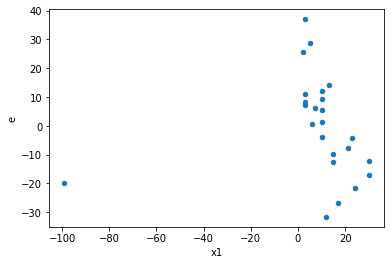

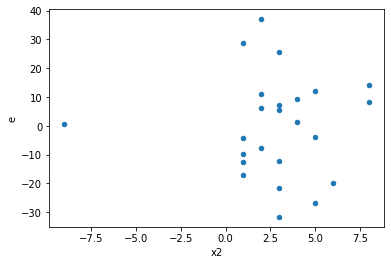

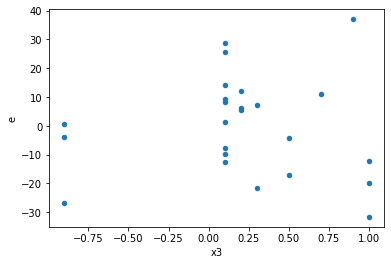

In [13]:
table_data_new.plot(x ='x1', y='e', kind = 'scatter')
table_data_new.plot(x ='x2', y='e', kind = 'scatter')
table_data_new.plot(x ='x3', y='e', kind = 'scatter')

In [14]:
# เรียง data จากน้อยไปมากตาม y_hat
new_table_sort = table_data_new.sort_values('y_hat')
new_table_sort.reset_index(inplace=True)
new_table_sort.drop(['index'], axis=1, inplace=True)
new_table_sort

,x1,x2,x3,y,y_hat,e
0,-99.0,6.0,1.0,-99.0,-79.132788,-19.867212
1,3.0,2.0,0.9,70.0,33.032631,36.967369
2,3.0,2.0,0.7,46.0,34.834748,11.165252
3,6.0,-9.0,-0.9,40.0,39.215676,0.784324
4,3.0,3.0,0.3,47.0,39.661926,7.338074
5,2.0,3.0,0.1,66.0,40.325258,25.674742
6,5.0,1.0,0.1,70.0,41.295729,28.704271
7,12.0,3.0,1.0,12.0,43.603585,-31.603585
8,7.0,2.0,0.2,50.0,43.895184,6.104816
9,3.0,8.0,0.1,56.0,47.578757,8.421243


In [15]:
# กำหนด % การแบ่งข้อมูล
percent_data = 0.4

In [16]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
table_new1

,x1,x2,x3,y,y_hat,e
0,-99.0,6.0,1.0,-99.0,-79.132788,-19.867212
1,3.0,2.0,0.9,70.0,33.032631,36.967369
2,3.0,2.0,0.7,46.0,34.834748,11.165252
3,6.0,-9.0,-0.9,40.0,39.215676,0.784324
4,3.0,3.0,0.3,47.0,39.661926,7.338074
5,2.0,3.0,0.1,66.0,40.325258,25.674742
6,5.0,1.0,0.1,70.0,41.295729,28.704271
7,12.0,3.0,1.0,12.0,43.603585,-31.603585
8,7.0,2.0,0.2,50.0,43.895184,6.104816


In [17]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
y = table_new1['y']
x = table_new1[['x1', 'x2', 'x3']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 1
DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
DF1

6.0

In [19]:
SSE1

3062.3885172060586

In [20]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
table_new2

,x1,x2,x3,y,y_hat,e
14,15.0,1.0,0.1,40.0,52.683585,-12.683585
15,15.0,1.0,0.1,43.0,52.683585,-9.683585
16,23.0,1.0,0.5,54.0,58.189635,-4.189635
17,13.0,8.0,0.1,73.0,58.966613,14.033387
18,21.0,2.0,0.1,53.0,60.739241,-7.739241
19,10.0,5.0,-0.9,57.0,60.892015,-3.892015
20,24.0,3.0,0.3,42.0,63.576423,-21.576423
21,30.0,3.0,1.0,52.0,64.101726,-12.101726
22,30.0,1.0,0.5,49.0,66.161134,-17.161134
23,17.0,5.0,-0.9,42.0,68.863514,-26.863514


In [21]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
y = table_new2['y']
x = table_new2[['x1', 'x2', 'x3']]

# add constant to predictor variable
x = sm.add_constant(x)
# fit linear regression model
model2 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 2
DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
DF2

7.0

In [23]:
SSE2

336.0428780816397

In [24]:
# ค่าสถิติทดสอบ
GQ_test = (SSE2/DF2) / (SSE1/DF1)
GQ_test

0.09405624107557492

In [25]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test, DF2, DF1)

In [26]:
two_tailed

1.9935860084874035

In [27]:
p_greater*2

0.006413991512596566

In [28]:
p_less

0.9967930042437018

###### The two-tailed p-value equals: 0.006414

###### p( x < 0.09406 ) = 0.003207
###### p( x > 0.09406 ) = 0.9968
###### p( x < 0.09406 ) + p( x >12.7374) = 0.006414
###### Since p-value ≤ α, H0 is rejected. (0.006414 ≤ 0.05)

https://www.statskingdom.com/p_value.html

In [29]:
Significance = 0.05
if (p_greater*2) < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=0 : Heteroscedasticity
